<a href="https://colab.research.google.com/github/harinadh01/Data-Analysis/blob/main/Global_Earthquake_Tsunami_Risk_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Earthquake-Tsunami Risk Data Analysis

In [29]:
from google.colab import files
uploaded = files.upload()


Saving earthquake_data_tsunami.csv to earthquake_data_tsunami (3).csv


In [30]:
import pandas as pd

# Get the filename from the uploaded dictionary
file_name = list(uploaded.keys())[0]

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
display(df.head())


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


In [33]:
df.shape


(782, 13)

In [34]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
count,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000,782.000000
mean,6.941125,4.333760,5.964194,870.108696,230.250639,1.325757,25.038990,75.883199,3.538100,52.609199,2012.280051,6.563939,0.388747
std,0.445514,3.169939,1.462724,322.465367,250.188177,2.218805,24.225067,137.277078,27.303429,117.898886,6.099439,3.507866,0.487778
min,6.500000,0.000000,1.000000,650.000000,0.000000,0.000000,0.000000,2.700000,-61.848400,-179.968000,2001.000000,1.000000,0.000000
25%,6.600000,0.000000,5.000000,691.000000,0.000000,0.000000,14.625000,14.000000,-14.595600,-71.668050,2007.000000,3.250000,0.000000
50%,6.800000,5.000000,6.000000,754.000000,140.000000,0.000000,20.000000,26.295000,-2.572500,109.426000,2013.000000,7.000000,0.000000
75%,7.100000,7.000000,7.000000,909.750000,445.000000,1.863000,30.000000,49.750000,24.654500,148.941000,2017.000000,10.000000,1.000000
max,9.100000,9.000000,9.000000,2910.000000,934.000000,17.654000,239.000000,670.810000,71.631200,179.662000,2022.000000,12.000000,1.000000


In [36]:
df.isnull().sum()



,0
magnitude,0
cdi,0
mmi,0
sig,0
nst,0
dmin,0
gap,0
depth,0
latitude,0
longitude,0


Duplicate rows: 0


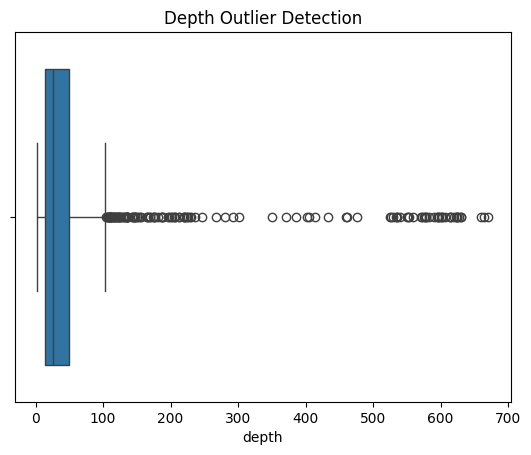

In [37]:
# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())

# Visualize outliers
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df['depth'])
plt.title("Depth Outlier Detection")
plt.show()


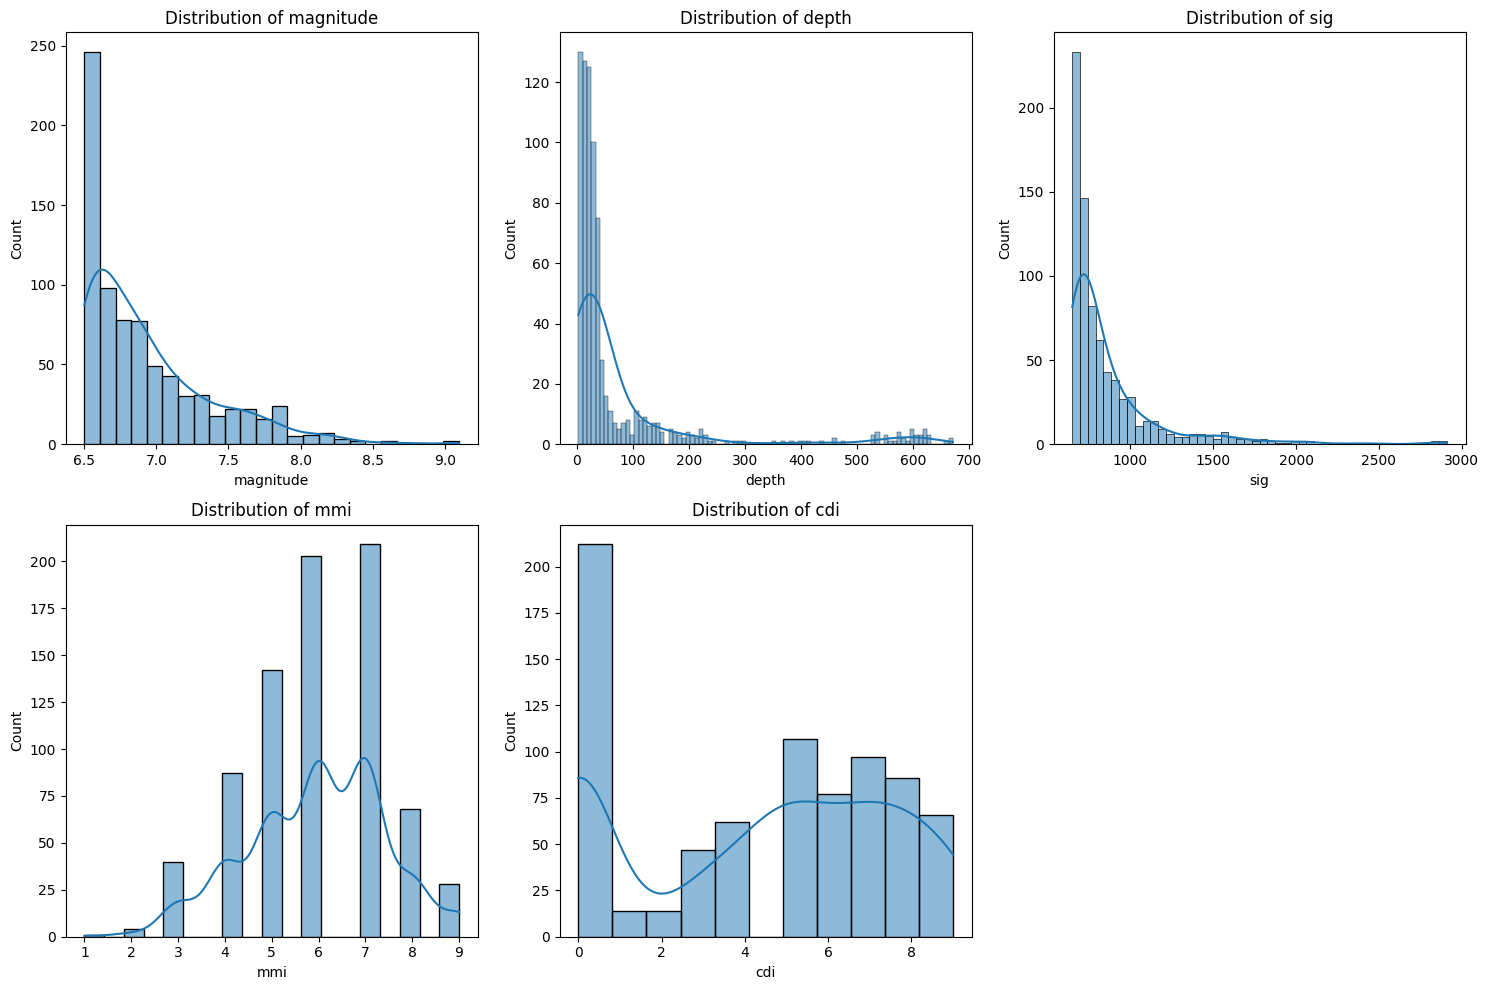

In [39]:
# Visualize distributions of key features
key_features = ['magnitude', 'depth', 'sig', 'mmi', 'cdi']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_features):
    if col in df.columns:
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], kde=True)
        plt.title(f'Distribution of {col}')
    else:
        print(f"Column '{col}' not found in the DataFrame.")
plt.tight_layout()
plt.show()

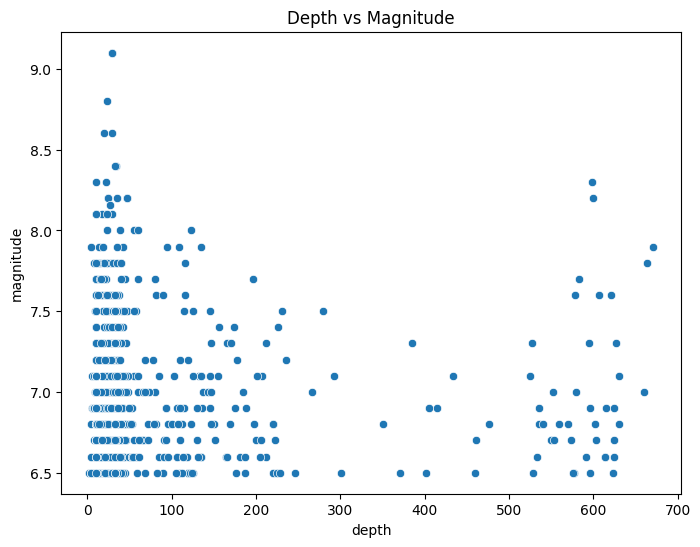

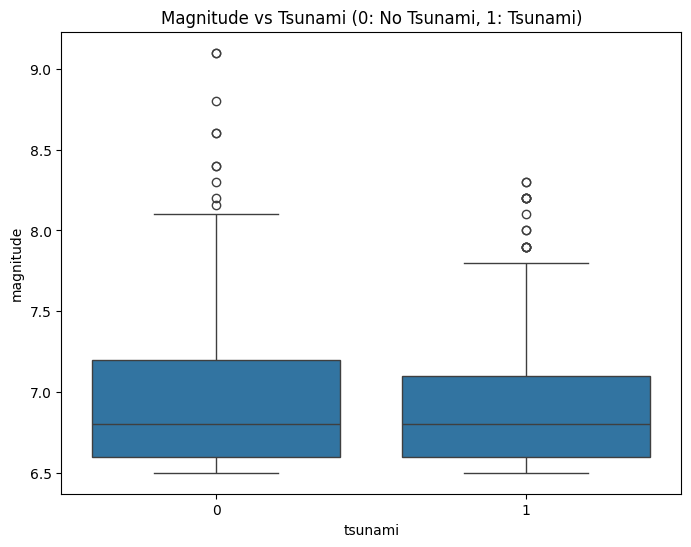

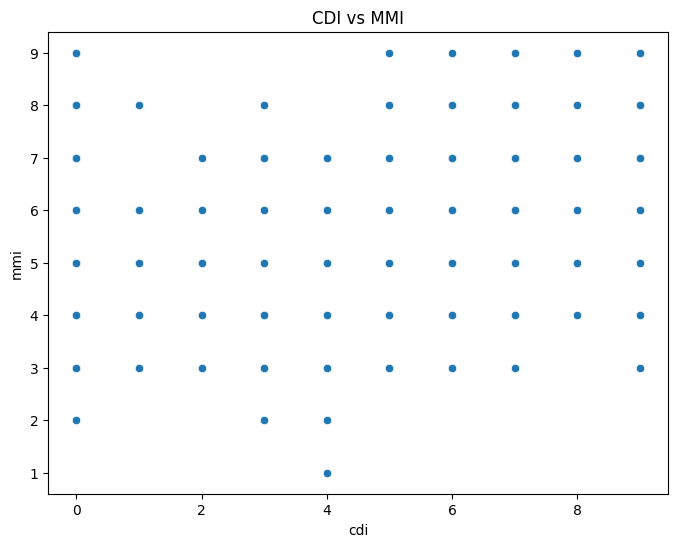

In [41]:
# Check relationships: depth vs magnitude
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='depth', y='magnitude')
plt.title('Depth vs Magnitude')
plt.show()

# Check relationships: magnitude vs tsunami
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='tsunami', y='magnitude')
plt.title('Magnitude vs Tsunami (0: No Tsunami, 1: Tsunami)')
plt.show()

# Check relationships: mmi vs cdi (intensity vs perceived intensity)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='cdi', y='mmi')
plt.title('CDI vs MMI')
plt.show()

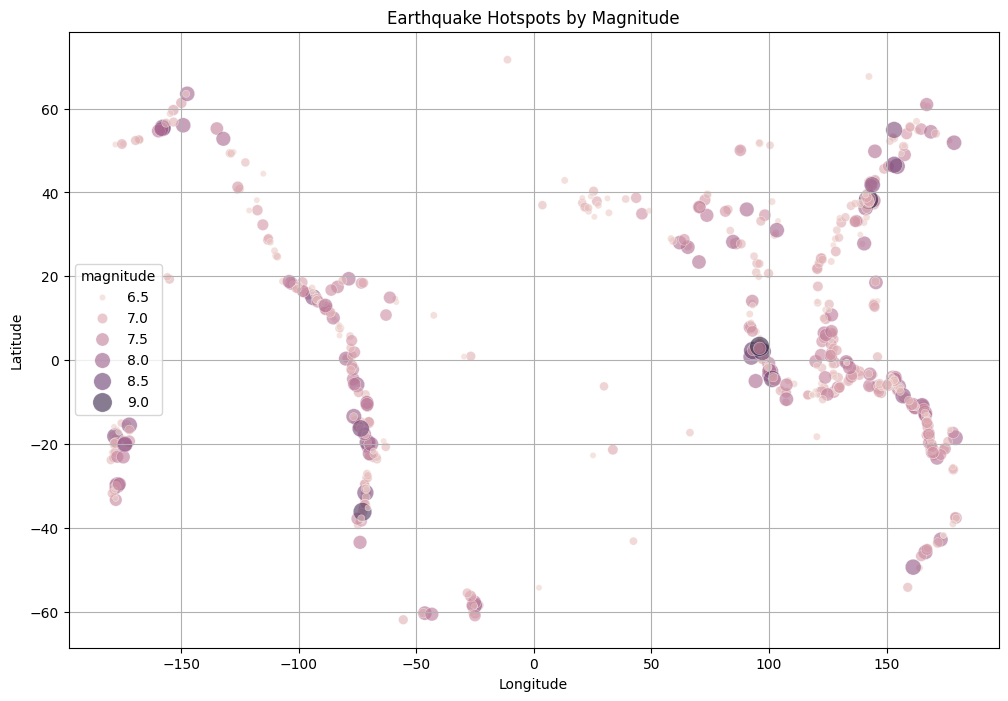

In [43]:
# Analyze geographic patterns: Plot earthquake hotspots
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='magnitude', size='magnitude', sizes=(20, 200), alpha=0.6)
plt.title('Earthquake Hotspots by Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [47]:
import folium
from branca.colormap import LinearColormap

# Create a base map centered around the mean latitude and longitude
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=2)

# Create a linear colormap based on magnitude
min_mag = df['magnitude'].min()
max_mag = df['magnitude'].max()
colormap = LinearColormap(['blue', 'green', 'yellow', 'red'],
                          index=[min_mag, min_mag + (max_mag - min_mag) / 3, max_mag - (max_mag - min_mag) / 3, max_mag],
                          caption='Magnitude')
colormap.add_to(m)

# Add earthquake locations to the map as circles, colored by magnitude
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['magnitude'] * 0.5,  # Adjust marker size based on magnitude
        color=colormap(row['magnitude']),
        fill=True,
        fill_color=colormap(row['magnitude']),
        fill_opacity=0.6,
        tooltip=f"Magnitude: {row['magnitude']}<br>Depth: {row['depth']}<br>Tsunami: {'Yes' if row['tsunami'] else 'No'}"
    ).add_to(m)

# Display the map
m

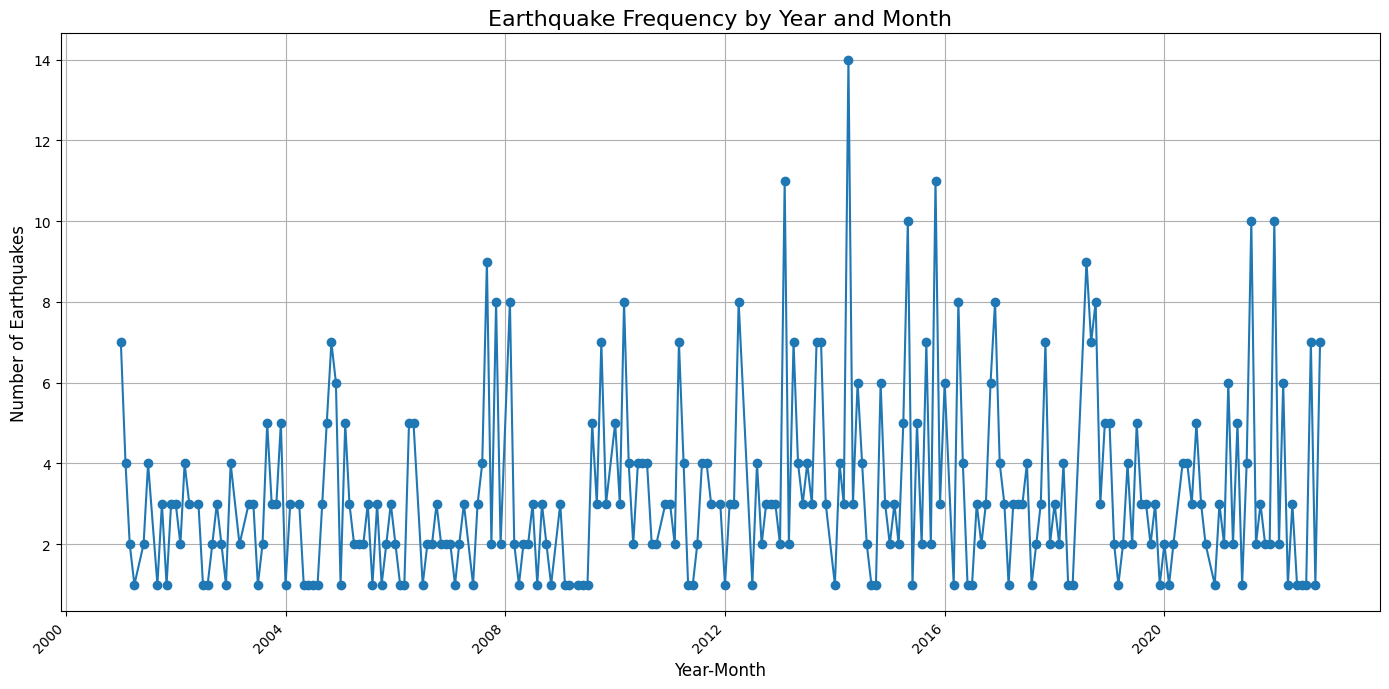

In [48]:
# Look for temporal trends: Earthquake frequency by year/month
df['Year-Month'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'].astype(str))

plt.figure(figsize=(14, 7)) # Increased figure size
df['Year-Month'].value_counts().sort_index().plot(marker='o', linestyle='-') # Added markers
plt.title('Earthquake Frequency by Year and Month', fontsize=16) # Increased title font size
plt.xlabel('Year-Month', fontsize=12) # Increased xlabel font size
plt.ylabel('Number of Earthquakes', fontsize=12) # Increased ylabel font size
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

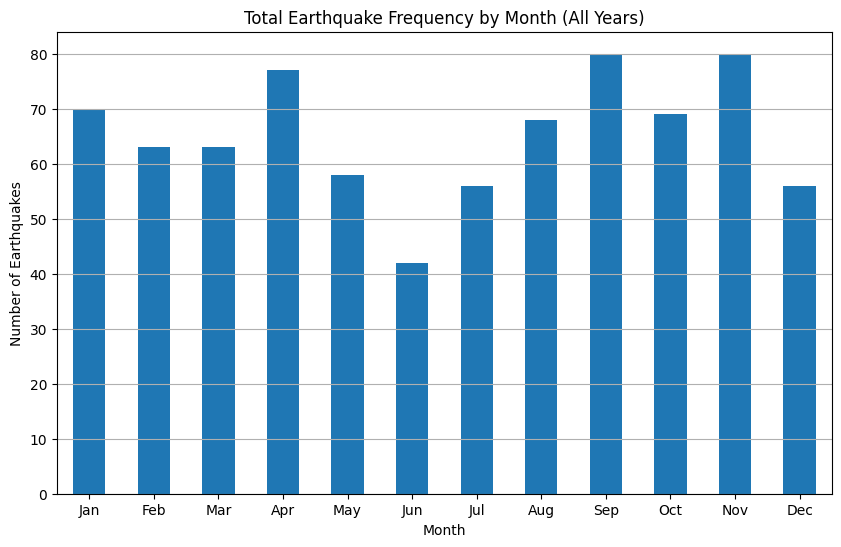

In [64]:
# Analyze seasonality: Earthquake frequency by month
earthquake_counts_by_month = df.groupby('Month').size()

plt.figure(figsize=(10, 6))
earthquake_counts_by_month.plot(kind='bar')
plt.title('Total Earthquake Frequency by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y')
plt.show()

# Modeling

In [58]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Instantiate the XGBoost classifier with selected features
xgb_model_selected = XGBClassifier(random_state=42)

# Train the classifier on the selected features
xgb_model_selected.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = xgb_model_selected.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Model Performance with Selected Features:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")

Model Performance with Selected Features:
Accuracy: 0.9363
Precision: 0.8923
Recall: 0.9508
F1-score: 0.9206
ROC AUC Score: 0.9390
Confusion Matrix:
[[89  7]
 [ 3 58]]


In [60]:
# Analyze tsunamis based on magnitude and depth
tsunami_data = df[df['tsunami'] == 1]

# Count tsunamis with magnitude > 7 and depth < 50 km
tsunami_high_mag_shallow_count = tsunami_data[(tsunami_data['magnitude'] > 7) & (tsunami_data['depth'] < 50)].shape[0]

# Total number of tsunamis
total_tsunami_count = tsunami_data.shape[0]

# Calculate the percentage
percentage_high_mag_shallow = (tsunami_high_mag_shallow_count / total_tsunami_count) * 100 if total_tsunami_count > 0 else 0

print(f"{percentage_high_mag_shallow:.2f}% of tsunamis occur when magnitude > 7 and depth < 50 km.")

18.75% of tsunamis occur when magnitude > 7 and depth < 50 km.


In [62]:
import folium
from branca.colormap import LinearColormap

# Filter data for tsunamis
tsunami_data = df[df['tsunami'] == 1].copy()

# Create a base map centered around the mean latitude and longitude of tsunami events
if not tsunami_data.empty:
    m_tsunami = folium.Map(location=[tsunami_data['latitude'].mean(), tsunami_data['longitude'].mean()], zoom_start=2)

    # Create a colormap for magnitude (optional, but can add more info)
    min_mag = tsunami_data['magnitude'].min()
    max_mag = tsunami_data['magnitude'].max()
    colormap_tsunami = LinearColormap(['blue', 'green', 'yellow', 'red'],
                              index=[min_mag, min_mag + (max_mag - min_mag) / 3, max_mag - (max_mag - min_mag) / 3, max_mag],
                              caption='Magnitude of Tsunami-causing Earthquakes')
    colormap_tsunami.add_to(m_tsunami)


    # Add tsunami locations to the map
    for index, row in tsunami_data.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=row['magnitude'] * 0.5,  # Adjust marker size
            color=colormap_tsunami(row['magnitude']),
            fill=True,
            fill_color=colormap_tsunami(row['magnitude']),
            fill_opacity=0.6,
            tooltip=f"Magnitude: {row['magnitude']}<br>Depth: {row['depth']}<br>Tsunami: {'Yes' if row['tsunami'] else 'No'}"
        ).add_to(m_tsunami)

    # Display the map
    display(m_tsunami)
else:
    print("No tsunami events in the data to map.")

# Task
Perform feature selection by using correlation analysis and feature importance to keep only the most predictive features.

## Prepare data for modeling

### Subtask:
Separate the target variable from the features and split the data into training and testing sets.


**Reasoning**:
Define features and target, then split the data into training and testing sets for model training.



In [51]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('tsunami', axis=1)
y = df['tsunami']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

display(X_train.head())
display(y_train.head())
display(X_test.head())
display(y_test.head())

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,Year-Month
549,7.7,5,7,918,288,0.000,29.8,17.00,-0.4140,132.8850,2009,1,2009-01-01
234,7.8,9,9,1545,0,0.481,21.0,15.11,-42.7373,173.0540,2016,11,2016-11-01
308,7.8,8,9,2820,0,1.857,12.0,8.22,28.2305,84.7314,2015,4,2015-04-01
384,6.7,4,5,715,0,3.741,22.0,12.00,5.7732,-78.1999,2013,8,2013-08-01
744,6.8,0,6,711,292,0.000,0.0,24.90,16.9850,-100.8650,2002,4,2002-04-01


,tsunami
549,0
234,1
308,0
384,1
744,0


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,Year-Month
395,6.8,0,3,711,131,0.000,18.0,602.2,18.7280,145.2880,2013,5,2013-05-01
332,6.9,8,7,1079,0,0.263,51.0,53.0,14.7240,-92.4614,2014,7,2014-07-01
25,7.3,9,8,2397,0,2.936,29.0,41.0,37.7015,141.5870,2022,3,2022-03-01
693,6.6,0,4,670,728,0.000,18.3,187.1,36.5120,71.0290,2004,4,2004-04-01
667,7.2,5,6,802,385,0.000,27.9,39.2,6.9100,92.9580,2004,12,2004-12-01


,tsunami
395,0
332,1
25,1
693,0
667,0


## Perform correlation analysis

### Subtask:
Calculate and visualize the correlation matrix to identify highly correlated features.


**Reasoning**:
Calculate and visualize the correlation matrix of the training features to identify highly correlated features.



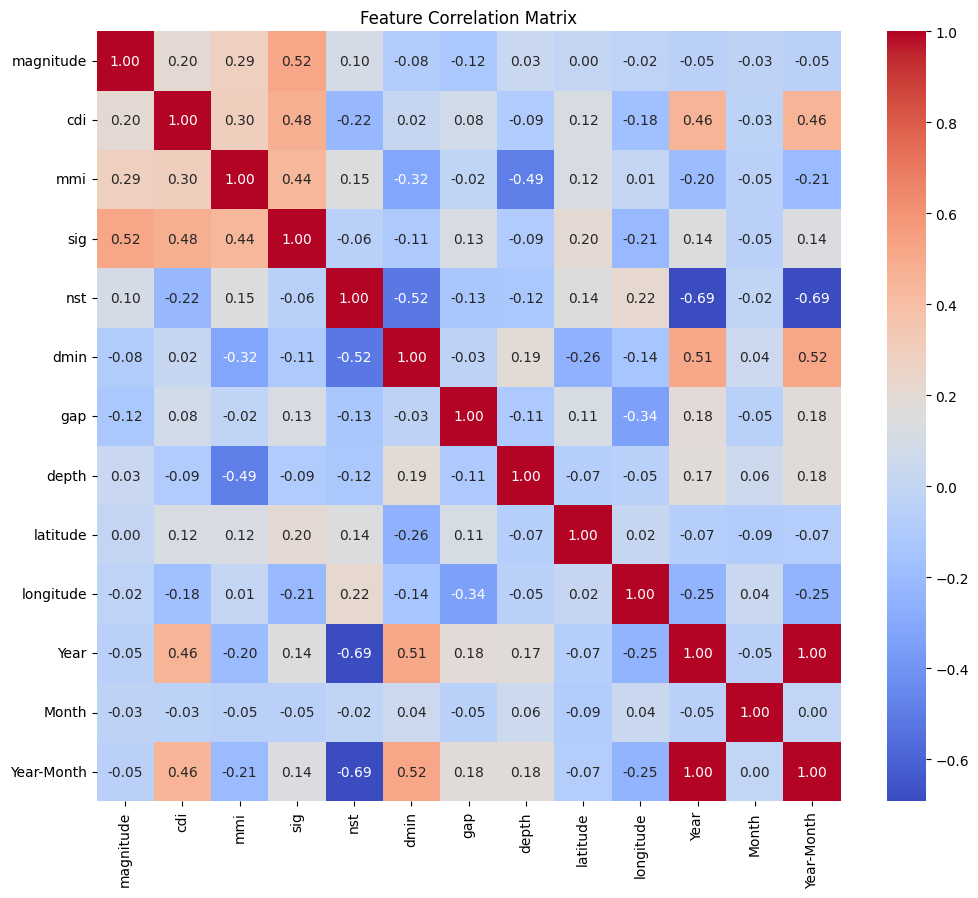

In [52]:
# Calculate the correlation matrix
correlation_matrix = X_train.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

## Train a model

### Subtask:
Train a Random Forest or XGBoost model on the training data to get feature importances.


**Reasoning**:
Train an XGBoost model on the training data to get feature importances.



In [53]:
from xgboost import XGBClassifier

# Instantiate the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the classifier
xgb_model.fit(X_train.select_dtypes(include=['number']), y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

## Analyze feature importance

### Subtask:
Extract and visualize the feature importances from the trained model.


**Reasoning**:
Extract, sort, and visualize the feature importances from the trained XGBoost model.



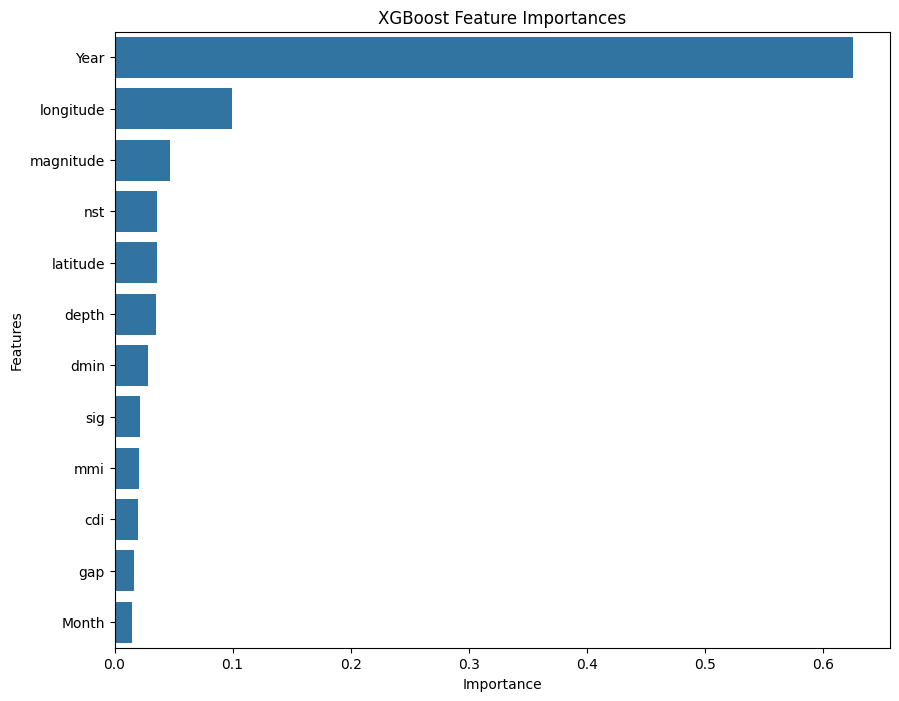

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Extract feature importances
feature_importances = xgb_model.feature_importances_

# Create a Pandas Series for easier handling and sorting
numerical_features = X_train.select_dtypes(include=['number']).columns
feature_importance_series = pd.Series(feature_importances, index=numerical_features)

# Sort feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Plot the sorted feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x=sorted_feature_importances.values, y=sorted_feature_importances.index)
plt.title('XGBoost Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Select features

### Subtask:
Based on the correlation analysis and feature importance, identify and select the most predictive features.


**Reasoning**:
Based on the correlation matrix and feature importance plot, I will identify the most predictive features and create a list of these features.



In [55]:
# Based on the correlation matrix and feature importance plot:
# - 'Year' has the highest feature importance and a moderate correlation with 'cdi' and 'dmin'.
# - 'longitude' has the second highest feature importance.
# - 'magnitude' has a moderate feature importance and correlation with 'sig', 'mmi', and 'cdi'.
# - 'depth' has a moderate feature importance but low correlation with other features and the target.
# - 'sig' has moderate feature importance and high correlation with 'magnitude', 'cdi', and 'mmi'.
# - 'cdi' and 'mmi' have moderate feature importance and are highly correlated with each other and 'sig'.
# - 'nst', 'dmin', and 'gap' have lower feature importance.

# Considering feature importance and avoiding high multicollinearity,
# we select a subset of features.
selected_features = ['Year', 'longitude', 'magnitude', 'depth', 'sig', 'cdi']

print("Selected features for modeling:")
print(selected_features)

Selected features for modeling:
['Year', 'longitude', 'magnitude', 'depth', 'sig', 'cdi']


## Drop low-impact or redundant columns

### Subtask:
Created a new DataFrame with only the selected features.


**Reasoning**:
Created new DataFrames for training and testing with only the selected features and display their heads.



In [56]:
# Create new DataFrames with only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Display the head of the new DataFrames
display(X_train_selected.head())
display(X_test_selected.head())

,Year,longitude,magnitude,depth,sig,cdi
549,2009,132.8850,7.7,17.00,918,5
234,2016,173.0540,7.8,15.11,1545,9
308,2015,84.7314,7.8,8.22,2820,8
384,2013,-78.1999,6.7,12.00,715,4
744,2002,-100.8650,6.8,24.90,711,0


,Year,longitude,magnitude,depth,sig,cdi
395,2013,145.2880,6.8,602.2,711,0
332,2014,-92.4614,6.9,53.0,1079,8
25,2022,141.5870,7.3,41.0,2397,9
693,2004,71.0290,6.6,187.1,670,0
667,2004,92.9580,7.2,39.2,802,5


## Summary:

### Data Analysis Key Findings

*   The data was successfully split into training and testing sets, with the target variable `tsunami` separated from the features.
*   A correlation analysis was performed on the training features, visualized as a heatmap, to identify relationships between features.
*   An XGBoost classifier was trained on the numerical training data to determine feature importances.
*   Feature importances were extracted from the trained XGBoost model and visualized in a bar plot, indicating 'Year' and 'longitude' as the most important features, followed by 'magnitude', 'depth', 'sig', 'cdi', 'mmi', 'nst', 'dmin', and 'gap' in decreasing order of importance.
*   Based on the correlation analysis and feature importance, a subset of features \['Year', 'longitude', 'magnitude', 'depth', 'sig', 'cdi'] was selected for modeling.
*   New dataframes `X_train_selected` and `X_test_selected` were created containing only the selected features.

### Insights or Next Steps

*   The selected features represent a balance between predictive power (based on feature importance) and avoiding high multicollinearity (based on correlation analysis).
*   The next step would be to train a predictive model using these selected features and evaluate its performance to see if feature selection improved the model's efficiency or accuracy.


Model Performance with Selected Features:

Accuracy: 0.9363

Precision: 0.8923

Recall: 0.9508

F1-score: 0.9206

ROC AUC Score: 0.9390


Confusion Matrix:

[ 89    7 ]

 [ 3   58 ]